# Análise de Componentes Principais (PCA)
<br/>
<br/>

## Conteúdo
- [Justificativa matemática](#justificativa_matematica)
- [Desenhando e testando o algoritmo](#desenhando_e_testando_o_algoritmo)

<br/>
<a id='justificativa_matematica'></a>

## Justificativa e matemática
Imagine que você quer entender o que impacta no preço de uma casa. Você então coleta vários dados e variáveis como área construida, área do terreno, número de andares, quantidade de quartos, quantidade de banheiros, arquiteto, material principal das paredes, coordenadas geográficas... Você está confiante de que as características da casa tem influência definitiva nos preços. Sua pergunta então é: quais das variáveis coletadas melhor definem as características?  

Se uma variável não varia na amostra, ela obviamente não será de grande utilidade. Como exemplo (um pouco absurdo), imagine que você coletou dados na forma de uma variável binária sobre se a casa tem ou não portas. Claro que todas as casas na amostra tem portas! Assim, fica fácil ver que conhecimento dessa variável binária não nos oferece nenhuma informação adicional. Em outras palavras, ela não é útil para descrever as particularidades da casa.

Por outro lado, pode ser que existam variáveis que variam na amostra, mas que são praticamente redundantes. Pode haver combinações lineares das variáveis coletadas que descrevam melhor a casa do que uma das variáveis individualmente. Talvez nem todas as variáveis sejam necessárias. Por exemplo, é bem provável que casas com mais quartos tenham também mais banheiros, assim, conhecendo apenas uma delas já se obtem bastante informação sobre a outra. De certa forma, essas variáveis são redundantes. Considere também as variáveis de área construida e terreno. É provavel que o tamanho da casa tem influência no preço, mas o que é o tamanho da casa? Devemos considerar área construida ou área do terreno? A verdade é que não temos a variável tamanho; o tamanho é uma variável que representa um conceito abstrato e que simplesmente não está nos nossos dados. Talvez pudessemos utilizar alguma combinação entre as variáveis de área construida e do terreno para inferir esse conceito abstrato que imaginamos como "tamanho".

A análise de componentes principal (PCA) serve justamente para resolver esses tipos de problemas: (1) se livrar de variáveis redundantes  e (2) montar variáveis latentes, ou seja que não estão nos nossos dados de forma explícita. É importante ressaltar logo que PCA **não** acha um subconjunto das variáveis existentes que melhor representam os dados; ele cria variáveis novas que melhor representam os dados!

PCA é um método de aprendizagem não supervisionada no sentido de que não usa informações sobre a variável de saida ($y$), mas acha uma forma melhor de representar as variáveis de entrada ($X$). Matematicamente, PCA mapeia os dados em uma nova base dimensional orthonormal que maximiza variância e que melhor representa os dados, ou seja, com o mínimo de perda de informação possível. PCA projeta os dados em direções $\pmb{w}$ tal que a amostra, após projetada em $\pmb{w_1}$ é o mais espalhada possível, de forma que as diferenças entre cada observação fique mais aparente. Para uma solução única, faremos $||\pmb{w_1}||=1$. A projeção de $\pmb{x}$ na direção $\pmb{w}$ é dada por $z = \pmb{w}^T \pmb{x}$. Além disso, $Cov(X) = \Sigma$. A estimativa de $\Sigma$ é dada por $S = X^T X$. Assim, 

$$Var(z_1) = \pmb{w_1}^T S \pmb{w_1}$$

Nós estamos interessados no componente principal $\pmb{w_1}$ que maximize $Var(z_1)$, sujeito à restrição $||\pmb{w_1}||=1$:

\begin{equation*}
\begin{aligned}
& \underset{\pmb{w_1}}{\text{max}}
& & \pmb{w_1}^T S \pmb{w_1} \\
& \text{sujeito à}
&  &\pmb{w_1}^T \pmb{w_1} - 1 = 0
\end{aligned}
\end{equation*}

Na forma do [lagrangeano](https://pt.wikipedia.org/wiki/Multiplicadores_de_Lagrange):

\begin{equation*}
\begin{aligned}
& \underset{\pmb{w_1}}{\text{max}}
& \pmb{w_1}^T S \pmb{w_1} - \lambda_1(\pmb{w_1}^T \pmb{w_1} - 1)  
\end{aligned}
\end{equation*}

A condição de primeira ordem fica:

\begin{equation}
\begin{split}
    \frac{\partial \mathcal{L}}{\partial \pmb{w_1}}  &= \pmb{w_1}^T S \pmb{w_1} - \lambda_1(\pmb{w_1}^T \pmb{w_1} - 1)  \\
             &= 2 S \pmb{w_1} - 2\lambda_1 \pmb{w_1} = 0  \\
             & \therefore S \pmb{w_1} = \lambda_1 \pmb{w_1}
\end{split}
\end{equation}

O que será verdadeiro quando $\pmb{w_1}$ for um [autovetor](https://pt.wikipedia.org/wiki/Autovalores_e_autovetores) de $S$ e $\lambda_1$ o maior [autovalor](https://pt.wikipedia.org/wiki/Autovalores_e_autovetores) correspondente.  
O segundo componente principal, $\pmb{w_2}$,  também deve maximizar variância e também deve ser ortogonal a $\pmb{w_1}$:

\begin{equation*}
\begin{aligned}
& \underset{\pmb{w_2}}{\text{max}}
& \pmb{w_2}^T S \pmb{w_2} - \lambda_2(\pmb{w_2}^T \pmb{w_2} - 1) -\beta_1(\pmb{w_2}^T \pmb{w_1} - 0)  
\end{aligned}
\end{equation*}

A condição de primeira ordem fica:
\begin{equation}
\begin{split}
    \frac{\partial \mathcal{L}}{\partial \pmb{w_2}}  &= \pmb{w_2}^T S \pmb{w_2} - \lambda_2(\pmb{w_2}^T \pmb{w_2} - 1) -\beta_1(\pmb{w_2}^T \pmb{w_1} - 0) = 0\\
             &= 2 S \pmb{w_2} - 2\lambda_2 \pmb{w_2} - \beta \pmb{w_1} = 0 \\
             &= 2 \pmb{w_1}^T S \pmb{w_2} - 2 \lambda_2 \pmb{w_1}^T \pmb{w_2} - \beta \pmb{w_1}^T\pmb{w_1} = 0 \\
             &= 2  \pmb{w_2}^T S \pmb{w_1} - \beta \pmb{w_1}^T\pmb{w_1} = 0\\
             &= 2 \lambda_1 \pmb{w_2}^T \pmb{w_1} - \beta \pmb{w_1}^T\pmb{w_1} = 0\\
             &= \beta \pmb{w_1}^T\pmb{w_1} = 0\\
             &\therefore \beta = 0 \\
             &\therefore S \pmb{w_2} = \lambda_2 \pmb{w_2}
\end{split}
\end{equation}

O que será verdadeiro quando $\pmb{w_2}$ for um autovetor de $S$ e $\lambda_2$ o segundo maior autovalor correspondente. Os próximos componentes principais podem ser derivados de forma análoga. Note que usamos o fato que que $ \pmb{w_1} S \pmb{w_2}^T$ é um escalar, igual ao seu trasposto $\pmb{w_2}^T S \pmb{w_1}$; que $\pmb{w_1}$ é um autovetor de $S$ e, portanto $S \pmb{w_1} = \lambda_1 \pmb{w_1}$.

Concluimos que as dimenções cuja projeção nelas tem maior variância são dadas pelos autovetores da matriz de covariância $S$.  

Seja $X$ a matriz de dados, $W$ a matriz dos componentes principais em que cada coluna é um componente principal e $\pmb{\mu}$ o vetor de médias de cada variável. Definimos então:

$$Z = (X - \pmb{\mu}) W^T$$

Que é a projeção dos dados originais nos componentes principais após serem centrados na origem. Podemos entender PCA então como um deslocamente dos eixos cartesianos, centrando-o meio dos dados, esticando-os ou comprimindo-os para ter tamanho unitário e rotacionando-os para maximizar variância.  

<br/>
<a id='desenhando_e_testando_o_algoritmo'></a>


## Projetando e testando o algoritmo
Uma vez que tenhamos a fórmula acima, construir o algoritmo é bastante simples:

In [1]:
%matplotlib inline
import pandas as pd # para manipulação de tabelas
import numpy as np # para álgebra linear
from sklearn.decomposition import PCA as skPCA # para ver se acertamos
import matplotlib.pyplot as plt # para gráficos
from matplotlib import style
from time import time
style.use('ggplot')
np.random.seed(12)

class PCA(object):

    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):
        S = np.dot(X.T, X) # matriz variância
        
        #np.linalg.eig - Calcula os valores próprios e os vetores próprios direitos de uma matriz quadrada.
        #https://pt.wikipedia.org/wiki/Autovalores_e_autovetores
        auto_val, auto_vect = np.linalg.eig(S) # achando os autovalores e autovetores

        sort_vect = np.argsort(auto_val)[::-1][:self.n_components] # para colocar em ordem crescente

        self.auto_val = auto_val[sort_vect]
        self.components_ = auto_vect[:, sort_vect]
        self.m = X.mean(axis=0) # média para centrar os dados


    def transform(self, X):
        print('pca próprio', np.round(self.auto_val, 3))
        print('pca próprio', np.round(self.components_, 3))
        return np.dot((X - self.m), self.components_) # projetando os dados


In [2]:
help(np.linalg.eig)

Help on function eig in module numpy.linalg:

eig(a)
    Compute the eigenvalues and right eigenvectors of a square array.
    
    Parameters
    ----------
    a : (..., M, M) array
        Matrices for which the eigenvalues and right eigenvectors will
        be computed
    
    Returns
    -------
    w : (..., M) array
        The eigenvalues, each repeated according to its multiplicity.
        The eigenvalues are not necessarily ordered. The resulting
        array will be of complex type, unless the imaginary part is
        zero in which case it will be cast to a real type. When `a`
        is real the resulting eigenvalues will be real (0 imaginary
        part) or occur in conjugate pairs
    
    v : (..., M, M) array
        The normalized (unit "length") eigenvectors, such that the
        column ``v[:,i]`` is the eigenvector corresponding to the
        eigenvalue ``w[i]``.
    
    Raises
    ------
    LinAlgError
        If the eigenvalue computation does not converg

# PCA reduzindo as dimensões dos dados

PCA é um algoritmo de aprendizado não supervisionado. Nos problemas não supervisionados, o objetivo é descrever os dados da melhor forma possivel. Essa definição é um pouco vaga, pois não há nada que diga o qual seja essa melhor forma possível. Com PCA, o "melhor" é entendido como uma descrição dos dados que maximiza a variância nas primeiras dimenções (componentes principais) e minimiza o erro de reconstrução. Isso porque, se os dados são fortemente redundante, alguns dos primeiros componentes principais já são suficiente para reconstruir os dados originais sem grandes perdas. Pense nos primeiros componentes principais como representando o máximo de informação nos dados. Assim, PCA pode ser utilizado também para diminuir a dimensão dos dados.

Uma exemplo visual ajudará a entender melhor. Suponha que temos os dados em duas dimensões como abaixo. Note que temos $x_1$ e $x_2$ mas $x_2$ é apenas duas vezes $x_1$ com um ruido adicionado.

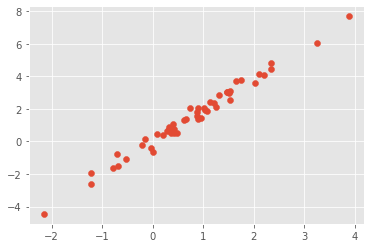

In [3]:
x1 = np.random.normal(1, 1, 50)
x2 = 2 * x1 + np.random.normal(0, 0.3, len(x1))
x3 = x1
dados = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3}).values
plt.scatter(dados[:,0], dados[:,1])
plt.show()

A pergunta então é: quantas dimensões são necessárias para representar os dados acima? Será que realmente precisamos das duas dimensções $x_1$ e $x_2$? A resposta é claro que não! $x_2$ é apenas duas vezes $x_1$ (mais um pequeno ruido aleatório), então se tivermos informação de $x_1$ automaticamente saberemos o valor de $x_2$! PCA é capaz de descobrir essas interdependência nos dados de tal forma que o primeiro componente principal já captará a informação de $x_1$ e $x_2$. Você pode ver que uma linha diagonal é capaz de modelar bem os dados acima? PCA então realiza uma rotação dos dados de forma que a primeira dimenção deixa de ser $x_1$ e passa a ser essa linha diagonal. Além disso, ele centraliza os dados em zero. Podemos vizualizar isso plotando os dois primeiros componentes principais. Imagine PCA como projetando os dados em um novo eixo cartesiano, em que os novos eixos são dados pelos pontos vermelhor e azul claro.

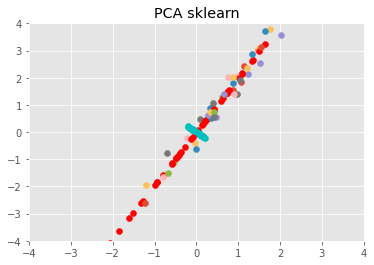

In [10]:
def plot_pca(dados, tranf_dados, components, titulo):

    pca1 = components[0]
    pca2 = components[1]

    for ii, jj in zip(tranf_dados, dados):
        plt.scatter(pca1[0] * ii[0], pca1[1] * ii[0], color = 'red')
        plt.scatter(pca2[0] * ii[1], pca2[1] * ii[1], color = 'c')
        plt.scatter(jj[0], jj[1])
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.title(titulo)
    plt.show()
    
pca = skPCA(n_components=2)
pca.fit(dados)
tranf_dados = pca.transform(dados)
plot_pca(dados, tranf_dados, pca.components_, 'PCA sklearn')


In [13]:
pca.components_[0]

array([0.41171322, 0.8130095 , 0.41171322])

In [14]:
pca.components_[1]

array([ 0.57488453, -0.58225042,  0.57488453])

In [6]:
data = pd.read_csv('hprice.csv', sep=',')

In [7]:
data.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     88 non-null     float64
 1   assess    88 non-null     float64
 2   bdrms     88 non-null     int64  
 3   lotsize   88 non-null     int64  
 4   sqrft     88 non-null     int64  
 5   colonial  88 non-null     int64  
 6   lprice    88 non-null     float64
 7   lassess   88 non-null     float64
 8   llotsize  88 non-null     float64
 9   lsqrft    88 non-null     float64
dtypes: float64(6), int64(4)
memory usage: 7.0 KB


pca próprio [1.63539473e+10 2.14624835e+08 4.02298753e+05]
pca próprio [[ 0.016 -0.133 -0.82 ]
 [ 0.017 -0.145 -0.539]
 [ 0.    -0.002 -0.002]
 [ 0.994  0.108  0.003]
 [ 0.105 -0.975  0.192]
 [ 0.    -0.    -0.001]]


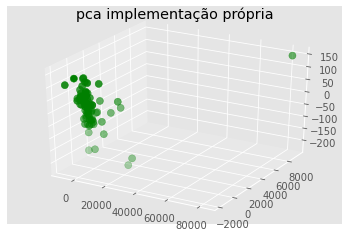

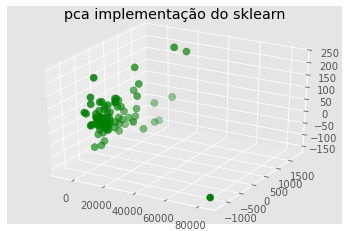

In [15]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

data = pd.read_csv('hprice.csv', sep=',').iloc[:, :6] # lendo os dados
data.fillna(-99999, inplace = True) # preenchendo valores vazios

# implementação do PCA próprio
pcaproprio = PCA(n_components=3)
pcaproprio.fit(data.values)
data = pcaproprio.transform(data)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='g', marker='o', s = 50)
plt.title('pca implementação própria')
plt.show()


pcasklearn = skPCA(n_components=3)
pcasklearn.fit(data)
data = pcasklearn.transform(data)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='g', marker='o', s = 50)
plt.title('pca implementação do sklearn')
plt.show()

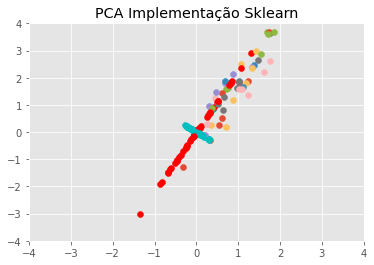

pca próprio [353.74    3.823]
pca próprio [[-0.424  0.566]
 [-0.801 -0.599]
 [-0.424  0.566]]


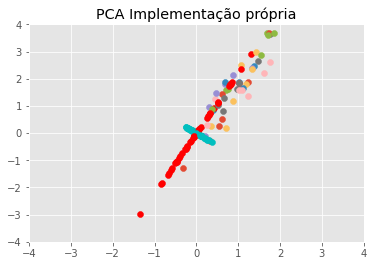

In [16]:
x1 = np.random.normal(1, 0.5, 50)
x2 = 2 * x1 + np.random.normal(0, 0.5, len(x1))
x3 = x1
dados = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3}).values

pca = skPCA(n_components=2)
pca.fit(dados)
tranf_dados = pca.transform(dados)
plot_pca(dados, tranf_dados, pca.components_, 'PCA Implementação Sklearn')

pcaproprio = PCA(n_components=2)
pcaproprio.fit(dados)
tranf_dados = pcaproprio.transform(dados)
plot_pca(dados, tranf_dados, pca.components_, 'PCA Implementação própria')
